In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook

from skimage.feature import hog
from skimage import data, color, exposure

In [2]:
image = color.rgb2gray(data.chelsea())

In [4]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

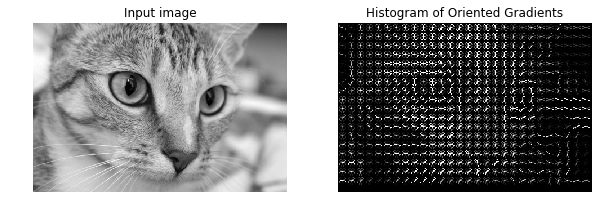

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable("box-forced")

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable("box-forced")

In [13]:
import numpy as np

In [14]:
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

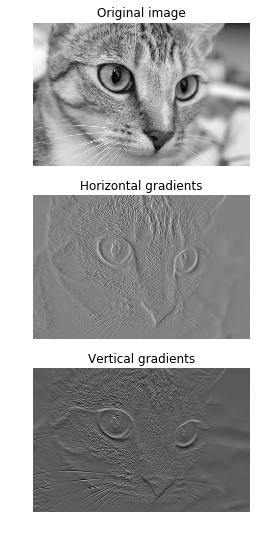

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(5, 9),sharex=True,sharey=True)

ax1.axis('off') 
ax1.imshow(image, cmap=plt.cm.gray) 
ax1.set_title('Original image') 
ax1.set_adjustable('box-forced') 
 
ax2.axis('off') 
ax2.imshow(gx, cmap=plt.cm.gray) 
ax2.set_title('Horizontal gradients') 
ax2.set_adjustable('box-forced') 
 
ax3.axis('off') 
ax3.imshow(gy, cmap=plt.cm.gray) 
ax3.set_title('Vertical gradients') 
ax3.set_adjustable('box-forced') 

In [33]:
import numpy as np 
from skimage import data, color 
from scipy import signal 

In [27]:
ind = [-1., -0.5, 0., 0.5, 1.] 
X,Y = np.meshgrid(ind, ind) 
X

array([[0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944],
       [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
       [0.60653066, 0.8824969 , 1.        , 0.8824969 , 0.60653066],
       [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
       [0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944]])

In [31]:
G = np.exp(-(np.multiply(X,X) + np.multiply(Y,Y))/2)
G

array([[0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944],
       [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
       [0.60653066, 0.8824969 , 1.        , 0.8824969 , 0.60653066],
       [0.53526143, 0.77880078, 0.8824969 , 0.77880078, 0.53526143],
       [0.36787944, 0.53526143, 0.60653066, 0.53526143, 0.36787944]])

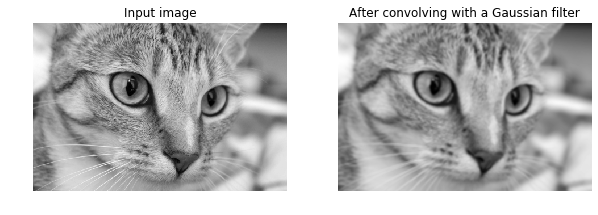

In [35]:
cat = color.rgb2gray(data.chelsea()) 
blurred_cat = signal.convolve2d(cat, G, mode='valid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off') 
ax1.imshow(cat, cmap=plt.cm.gray) 
ax1.set_title('Input image') 
ax1.set_adjustable('box-forced') 
 
ax2.axis('off') 
ax2.imshow(blurred_cat, cmap=plt.cm.gray) 
ax2.set_title('After convolving with a Gaussian filter')
ax2.set_adjustable('box-forced') 